In [2]:
import sys
import parmed as pm
from simtk import openmm as mm
from simtk import unit
from simtk.openmm import app
import numpy as np
import os, re
from simtk import unit
from simtk.openmm import KcalPerKJ
import matplotlib.pyplot as plt
import mdtraj
from simtk.openmm.vec3 import Vec3


In [3]:
intermediate_step = 0
structure = 'methylindole'
tlc = 'LIG'
system_in_solv = 'system_in_solv'


In [4]:
# Run CHARMM energy and force calculation
import subprocess
print('Running CHARMM as subprocess container (may take a minute)...')
traj_for_bxl  = mdtraj.load(f"/home/mwieder/tmp_wd/{structure}-sai/traj/prod_solv_{structure}_step{intermediate_step}.dcd", top=f"/home/mwieder/tmp_wd/{structure}-sai/is{intermediate_step}/system_in_solv.psf")
bxl_in_angstrom = traj_for_bxl.unitcell_lengths[0][0] * 10.0

command = f"""cd /home/mwieder/tmp_wd/{structure}-sai/is{intermediate_step}/;  cp /home/mwieder/tmp_wd/energy_in_sol.inp .; /data/shared/software/charmm_openMM/charmm/exec/gnu/charmm residue_name:{tlc} crd:{system_in_solv} psf:{system_in_solv} structure:{structure} conf:{intermediate_step} bxl:{bxl_in_angstrom} -i energy_in_sol.inp"""
charmm_output = subprocess.check_output(command, shell=True, universal_newlines=True)

# Parse CHARMM energy and force output
"""
ENER ENR:  Eval#     ENERgy      Delta-E         GRMS
ENER INTERN:          BONDs       ANGLes       UREY-b    DIHEdrals    IMPRopers
ENER CROSS:           CMAPs        PMF1D        PMF2D        PRIMO
ENER EXTERN:        VDWaals         ELEC       HBONds          ASP         USER
ENER IMAGES:        IMNBvdw       IMELec       IMHBnd       RXNField    EXTElec
ENER EWALD:          EWKSum       EWSElf       EWEXcl       EWQCor       EWUTil
 ----------       ---------    ---------    ---------    ---------    ---------
ENER>        0-163043.99835      0.00000      5.02279
ENER INTERN>     6337.99813   4236.12181     54.30685   1726.66813     21.86301
ENER CROSS>       -21.48984      0.00000      0.00000      0.00000
ENER EXTERN>    20161.20647-164737.82886      0.00000      0.00000      0.00000
ENER IMAGES>      243.39096  -5318.48694      0.00000      0.00000      0.00000
ENER EWALD>       4130.5989-1021718.0599  991839.7129       0.0000       0.0000
"""
print('Parsing CHARMM output...')
keys = list()
values = list()
for line in charmm_output.split('\n'):
    if line.startswith('ENER'):
        print(line)
        if ':' in line:
            elements = line.split(':')
            tokens = elements[1].split()
            for token in tokens:
                token = token.strip()
                keys.append(token)
        elif '>' in line:
            elements = line.split('>')

            tokens = re.split('(-|\+)|\s+', elements[1].strip())
            index = 0
            while index < len(tokens):
                if (tokens[index] is None) or (len(tokens[index])==0):
                    index += 1
                elif tokens[index] in ['+', '-']:
                    token = (tokens[index] + tokens[index+1]).strip()
                    value = float(token)
                    index += 2
                    values.append(value)
                else:
                    token = tokens[index].strip()
                    value = float(token)
                    index += 1
                    values.append(value)

from collections import OrderedDict
charmm_energy_components = []
tmp = {}
for (key, value) in zip(keys, values):
    tmp[key] = value
    if key == 'VIRI':
        charmm_energy_components.append(tmp)
        tmp = {}



Running CHARMM as subprocess container (may take a minute)...
Parsing CHARMM output...
ENER ENR:  Eval#     ENERgy      Delta-E         GRMS
ENER INTERN:          BONDs       ANGLes       UREY-b    DIHEdrals    IMPRopers
ENER EXTERN:        VDWaals         ELEC       HBONds          ASP         USER
ENER>        0  -7630.57310      0.00000     20.94220
ENER INTERN>        7.54792     18.31361      0.00000      5.52141      0.67462
ENER EXTERN>     1347.09959  -9009.73024      0.00000      0.00000      0.00000
ENER ENR:  Eval#     ENERgy      Delta-E         GRMS
ENER INTERN:          BONDs       ANGLes       UREY-b    DIHEdrals    IMPRopers
ENER EXTERN:        VDWaals         ELEC       HBONds          ASP         USER
ENER>        0  -7630.57310      0.00000     20.94220
ENER INTERN>        7.54792     18.31361      0.00000      5.52141      0.67462
ENER EXTERN>     1347.09959  -9009.73024      0.00000      0.00000      0.00000
ENER ENR:  Eval#     ENERgy      Delta-E         GRMS
ENE

ENER INTERN:          BONDs       ANGLes       UREY-b    DIHEdrals    IMPRopers
ENER EXTERN:        VDWaals         ELEC       HBONds          ASP         USER
ENER IMAGES:        IMNBvdw       IMELec       IMHBnd       RXNField    EXTElec
ENER EWALD:          EWKSum       EWSElf       EWEXcl       EWQCor       EWUTil
ENER LRCor:            EVDW         VIRI   
ENER>        0  -9407.85020      9.35905      4.00254
ENER INTERN>        5.39027     17.86220      0.00000      5.25296      0.56306
ENER EXTERN>     1268.44120  -8295.99934      0.00000      0.00000      0.00000
ENER IMAGES>       75.27209  -1318.78392      0.00000      0.00000      0.00000
ENER EWALD>        88.11322 -65946.06506  64715.36221      0.00000      0.00000
ENER LRCor>       -23.25908    -46.51308
ENER ENR:  Eval#     ENERgy      Delta-E         GRMS
ENER INTERN:          BONDs       ANGLes       UREY-b    DIHEdrals    IMPRopers
ENER EXTERN:        VDWaals         ELEC       HBONds          ASP         USER
ENER IM

ENER EXTERN:        VDWaals         ELEC       HBONds          ASP         USER
ENER IMAGES:        IMNBvdw       IMELec       IMHBnd       RXNField    EXTElec
ENER EWALD:          EWKSum       EWSElf       EWEXcl       EWQCor       EWUTil
ENER LRCor:            EVDW         VIRI   
ENER>        0  -9464.51765     -8.11033      4.05578
ENER INTERN>        8.16445     17.47468      0.00000      6.22990      0.37108
ENER EXTERN>     1343.47542  -8386.30790      0.00000      0.00000      0.00000
ENER IMAGES>       92.13110  -1377.74318      0.00000      0.00000      0.00000
ENER EWALD>        86.30277 -65946.06506  64715.22616      0.00000      0.00000
ENER LRCor>       -23.77707    -47.54893
ENER ENR:  Eval#     ENERgy      Delta-E         GRMS
ENER INTERN:          BONDs       ANGLes       UREY-b    DIHEdrals    IMPRopers
ENER EXTERN:        VDWaals         ELEC       HBONds          ASP         USER
ENER IMAGES:        IMNBvdw       IMELec       IMHBnd       RXNField    EXTElec
ENER EW

ENER IMAGES:        IMNBvdw       IMELec       IMHBnd       RXNField    EXTElec
ENER EWALD:          EWKSum       EWSElf       EWEXcl       EWQCor       EWUTil
ENER LRCor:            EVDW         VIRI   
ENER>        0  -9535.88351      9.12145      3.88864
ENER INTERN>        5.93987     17.41695      0.00000      4.03367      0.52064
ENER EXTERN>     1382.87516  -8546.25056      0.00000      0.00000      0.00000
ENER IMAGES>      103.64620  -1333.00189      0.00000      0.00000      0.00000
ENER EWALD>        83.02126 -65946.06506  64715.39466      0.00000      0.00000
ENER LRCor>       -23.41441    -46.82370
ENER ENR:  Eval#     ENERgy      Delta-E         GRMS
ENER INTERN:          BONDs       ANGLes       UREY-b    DIHEdrals    IMPRopers
ENER EXTERN:        VDWaals         ELEC       HBONds          ASP         USER
ENER IMAGES:        IMNBvdw       IMELec       IMHBnd       RXNField    EXTElec
ENER EWALD:          EWKSum       EWSElf       EWEXcl       EWQCor       EWUTil
ENER LR

In [5]:
charmm_bond = []
charmm_angle = []
charmm_dihedral = []
charmm_lj = []
charmm_electrostatic = []
charmm_nonbonded = []
charmm_energy = []

for frame in charmm_energy_components:
    # Form CHARMM energy components
    charmm_bond.append(frame['BONDs'])
    charmm_angle.append(frame['ANGLes'])
    charmm_dihedral.append(frame['DIHEdrals'] + frame['IMPRopers'])
    charmm_lj.append(frame['VDWaals'] + frame['IMNBvdw'])
                     
    charmm_electrostatic.append(frame['ELEC'] + frame['IMELec'] + frame['EWKSum'] + frame['EWSElf'] + frame['EWEXcl'])
    charmm_nonbonded.append(frame['VDWaals'] + frame['IMNBvdw'] + frame['ELEC'] + frame['IMELec'] + frame['EWKSum'] + frame['EWSElf'] + frame['EWEXcl'])
    if 'GEO' in frame:
        charmm_energy.append(frame['ENERgy'] + frame['GEO'])
    else:
        charmm_energy.append(frame['ENERgy'] - frame['EVDW'] )


In [24]:
def _scale_charges_ccelecfac(system):

    num_of_forces = system.getNumForces()
    for i in range(num_of_forces):
        force = system.getForce(i)
        if force.__class__.__name__ == 'NonbondedForce':
            for idx in range(force.getNumParticles()):
                charge, sigma, epsilon = force.getParticleParameters(idx)
                # assuming that the units electron charge (CHARMM) and proton charge (openMM) are equivalent
                scaled_charge = 0.99997081505487725338 * charge
                force.setParticleParameters(idx, scaled_charge, sigma, epsilon)
    return system

psf = pm.charmm.CharmmPsfFile(f"/home/mwieder/tmp_wd/{structure}-sai/is{intermediate_step}/system_in_solv.psf")
crd = pm.charmm.CharmmCrdFile(f"/home/mwieder/tmp_wd/{structure}-sai/is{intermediate_step}/system_in_solv.crd")
parameter_files = f"/home/mwieder/tmp_wd/{structure}-sai/is{intermediate_step}/parameters.prm", f"/home/mwieder/tmp_wd/{structure}-sai/is{intermediate_step}/atom_definitions.rtf"
# set up parameter objec
parameter = pm.charmm.CharmmParameterSet(*parameter_files)

traj_for_bxl  = mdtraj.load(f"/home/mwieder/tmp_wd/{structure}-sai/traj/prod_solv_{structure}_step{intermediate_step}.dcd", top=f"/home/mwieder/tmp_wd/{structure}-sai/is{intermediate_step}/system_in_solv.psf")
bxl_in_angstrom = traj_for_bxl.unitcell_lengths[0][0] * 10.0
print(bxl_in_angstrom)
a = unit.Quantity(( bxl_in_angstrom * unit.angstrom, 0 * unit.angstrom, 0 * unit.angstrom))
b = unit.Quantity((0 * unit.angstrom, bxl_in_angstrom* unit.angstrom, 0 * unit.angstrom))
c = unit.Quantity((0 * unit.angstrom, 0 * unit.angstrom, bxl_in_angstrom * unit.angstrom))
psf.box_vectors = (a, b, c)

psf.positions = crd.positions

system = psf.createSystem(parameter, nonbondedMethod=app.PME,
                               nonbondedCutoff=12.0*unit.angstroms,
                               switchDistance=10.0*unit.angstroms, 
                          constraints=app.HBonds)

#system.setDefaultPeriodicBoxVectors(a,b,c)
system = _scale_charges_ccelecfac(system)
platform = mm.Platform.getPlatformByName('CPU')

integrator = mm.LangevinIntegrator(
                             300*unit.kelvin,       # Temperature of heat bath
                             1.0/unit.picoseconds,  # Friction coefficient
                             2.0*unit.femtoseconds, # Time step
)


for force in system.getForces():
    if isinstance(force, mm.NonbondedForce):
        print('NonbondedForce: %s' % force.getUseSwitchingFunction())
        print('LRC? %s' % force.getUseDispersionCorrection())
        force.setUseDispersionCorrection(False)
        force.setPMEParameters(1.0/0.34, 32, 32, 32) # NOTE: These are hard-coded!

sim = app.Simulation(psf.topology, system, integrator, platform)

openMM_total = []
openMM_energy = []
openMM_bond = []
openMM_angle = []
openMM_dihedral = []
openMM_improper = []
openMM_nonbonded = []
from simtk.openmm.vec3 import Vec3

traj  = mdtraj.load(f"/home/mwieder/tmp_wd/{structure}-sai/traj/prod_solv_{structure}_step{intermediate_step}.dcd", top=f"/home/mwieder/tmp_wd/{structure}-sai/is{intermediate_step}/system_in_solv.psf")
for idx in range(traj.n_frames)[:500]:
    volumn = ((traj.unitcell_lengths[idx][0]) * (unit.nano * unit.meter))** 3
    pressure = 1.0 * unit.atmosphere # atm      
    pV = (volumn * pressure * unit.AVOGADRO_CONSTANT_NA).in_units_of(unit.kilocalorie_per_mole)
    bxl_in_nm = traj.unitcell_lengths[idx][0] 
    a = Vec3(bxl_in_nm, 0 , 0 )
    b = Vec3(0, bxl_in_nm, 0 )
    c = Vec3(0, 0 , bxl_in_nm )
    sim.context.setPeriodicBoxVectors(a,b,c)
    sim.context.setPositions((traj.openmm_positions(idx)))
    state = sim.context.getState(getEnergy=True, enforcePeriodicBox=False)
    e = state.getPotentialEnergy().in_units_of(unit.kilocalorie_per_mole)
    e_pV = (e - pV) * (unit.mole / unit.kilocalorie)
    e_pV = (e) * (unit.mole / unit.kilocalorie)
    
    openMM_energy.append(e_pV)
    omm_e = pm.openmm.energy_decomposition(psf, sim.context)
    openMM_bond.append(omm_e['bond'])
    openMM_angle.append(omm_e['angle'])
    openMM_dihedral.append(omm_e['dihedral'])
    openMM_nonbonded.append(omm_e['nonbonded'])
    openMM_total.append(omm_e['total'])

31.156280040740967
NonbondedForce: True
LRC? True


In [25]:
openMM_energy[0]

-9453.378316830316

In [26]:
charmm_energy[3] + pV._value

-9453.44363961292

In [12]:
volumn = ((traj.unitcell_lengths[idx][0]) * (unit.nano * unit.meter))** 3
pressure = 1.0 * unit.atmosphere # atm      
pV = (volumn * pressure * unit.AVOGADRO_CONSTANT_NA).in_units_of(unit.kilocalorie_per_mole)
pV

Quantity(value=0.44215038708040927, unit=kilocalorie/mole)

In [11]:
openMM_energy[0]

-9453.378313183377

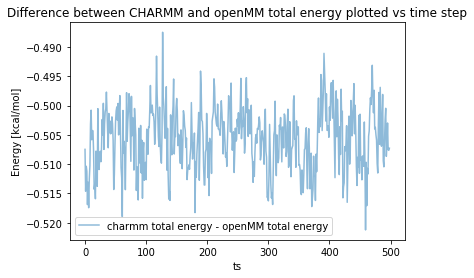

In [7]:
diff = np.asarray(charmm_energy[3:]) - np.asarray(openMM_energy[0:-1])
plt.plot(diff, label='charmm total energy - openMM total energy', alpha=0.5)

plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')
plt.title('Difference between CHARMM and openMM total energy plotted vs time step')

plt.legend()
plt.savefig('total_energy_openMM_vs_charmm_diff.png', dpi=600, bbox_inches='tight')

plt.show()


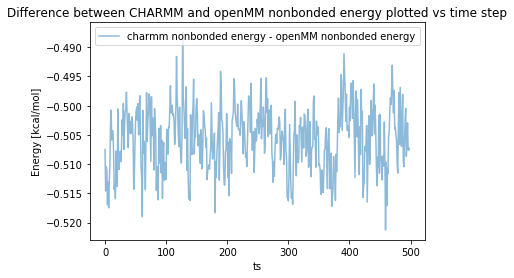

In [8]:
plt.plot(np.asarray(charmm_nonbonded[3:]) - np.asarray(openMM_nonbonded[:-1]), label='charmm nonbonded energy - openMM nonbonded energy', alpha=0.5)
   

plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')
plt.title('Difference between CHARMM and openMM nonbonded energy plotted vs time step')

plt.legend()
plt.savefig('nonbonded_energy_openMM_vs_charmm_differences.png', dpi=600, bbox_inches='tight')
plt.show()


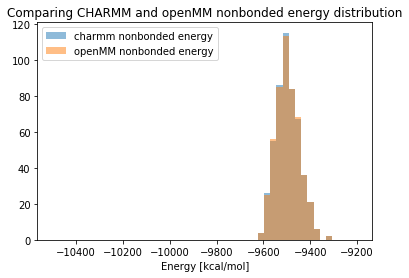

In [35]:
plt.hist(charmm_nonbonded, np.linspace(-10500, -9200), label='charmm nonbonded energy', alpha=0.5)
plt.hist(openMM_nonbonded, np.linspace(-10500, -9200),label='openMM nonbonded energy', alpha=0.5)

plt.xlabel('Energy [kcal/mol]')
plt.title('Comparing CHARMM and openMM nonbonded energy distribution')
plt.legend()
plt.savefig('nonbonded_energy_openMM_vs_charmm.png', dpi=600, bbox_inches='tight')
plt.show()


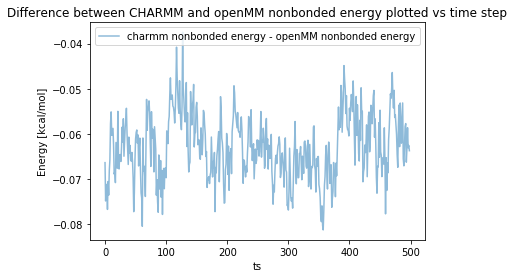

In [36]:
plt.plot(np.asarray(charmm_nonbonded[3:]) - np.asarray(openMM_nonbonded[:-1]), label='charmm nonbonded energy - openMM nonbonded energy', alpha=0.5)
   

plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')
plt.title('Difference between CHARMM and openMM nonbonded energy plotted vs time step')

plt.legend()
plt.savefig('nonbonded_energy_openMM_vs_charmm_differences.png', dpi=600, bbox_inches='tight')
plt.show()


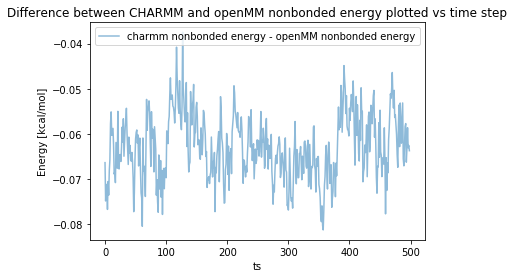

In [37]:
plt.plot(np.asarray(charmm_nonbonded[3:]) - np.asarray(openMM_nonbonded[:-1]), label='charmm nonbonded energy - openMM nonbonded energy', alpha=0.5)
   

plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')
plt.title('Difference between CHARMM and openMM nonbonded energy plotted vs time step')

plt.legend()
plt.savefig('nonbonded_energy_openMM_vs_charmm_differences.png', dpi=600, bbox_inches='tight')
plt.show()


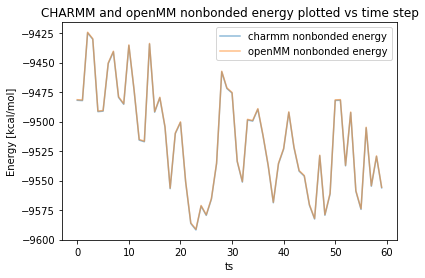

In [61]:
plt.plot(charmm_nonbonded[3:63], label='charmm nonbonded energy', alpha=0.5)  
plt.plot(openMM_nonbonded[0:60], label='openMM nonbonded energy', alpha=0.5)
plt.title('CHARMM and openMM nonbonded energy plotted vs time step')
plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')
plt.legend()
plt.savefig('nonbonded_energy_openMM_vs_charmm_selected_ts.png', dpi=600, bbox_inches='tight')

plt.show()


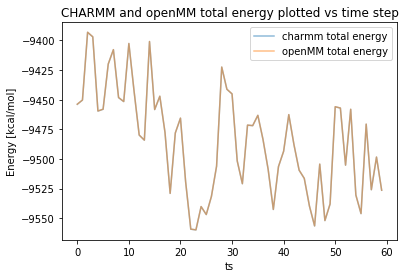

In [39]:
plt.plot(charmm_energy[3:63], label='charmm total energy', alpha=0.5)  
plt.plot(openMM_energy[0:60], label='openMM total energy', alpha=0.5)
plt.title('CHARMM and openMM total energy plotted vs time step')
plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')
plt.legend()
plt.savefig('total_energy_openMM_vs_charmm_selected_ts.png', dpi=600, bbox_inches='tight')

plt.show()


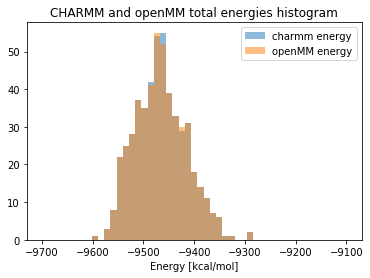

In [40]:

plt.hist(charmm_energy, np.linspace(-9700, -9100), label='charmm energy', alpha=0.5)
plt.hist(openMM_energy, np.linspace(-9700, -9100), label='openMM energy', alpha=0.5)
plt.xlabel('Energy [kcal/mol]')
plt.title('CHARMM and openMM total energies histogram')
plt.savefig('total_energy_openMM_vs_charmm_histogram.png', dpi=600, bbox_inches='tight')

plt.legend()
plt.show()


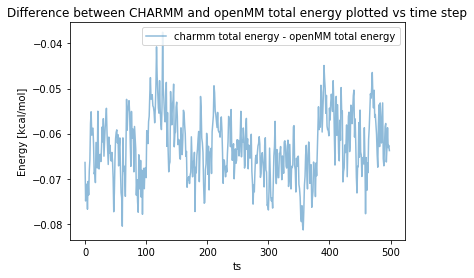

In [43]:
diff = np.asarray(charmm_energy[3:]) - np.asarray(openMM_energy[0:-1])
plt.plot(diff, label='charmm total energy - openMM total energy', alpha=0.5)

plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')
plt.title('Difference between CHARMM and openMM total energy plotted vs time step')

plt.legend()
plt.savefig('total_energy_openMM_vs_charmm_diff.png', dpi=600, bbox_inches='tight')

plt.show()


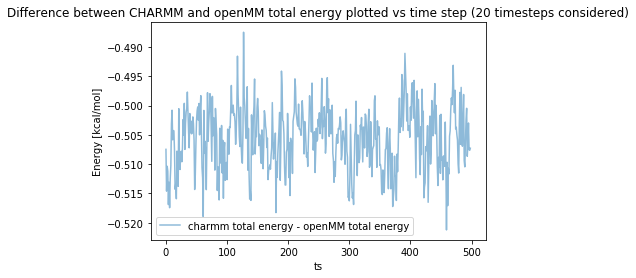

In [27]:
diff = np.asarray(charmm_energy[3:]) - np.asarray(openMM_total[0:-1])
plt.plot(diff, label='charmm total energy - openMM total energy', alpha=0.5)

plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')
plt.title('Difference between CHARMM and openMM total energy plotted vs time step (20 timesteps considered)')

plt.legend()
plt.savefig('total_energy_openMM_vs_charmm_diff.png', dpi=600, bbox_inches='tight')

plt.show()


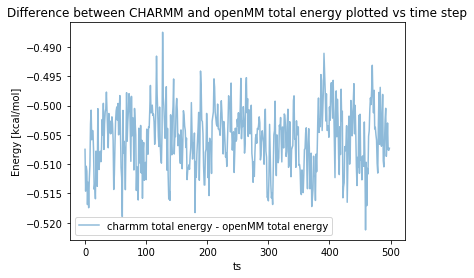

In [28]:
plt.plot(np.asarray(charmm_energy[3:]) - np.asarray(openMM_energy[0:-1]), label='charmm total energy - openMM total energy', alpha=0.5)
   
plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')
plt.title('Difference between CHARMM and openMM total energy plotted vs time step')

plt.legend()
plt.show()


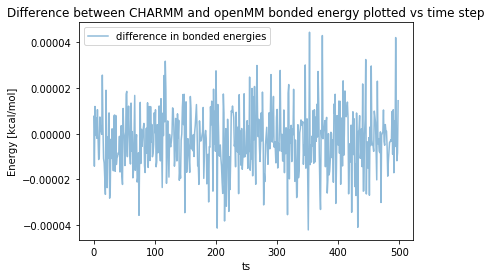

In [29]:
plt.plot(np.asarray(charmm_bond[3:]) - np.asarray(openMM_bond[:-1]), label='difference in bonded energies', alpha=0.5)
plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')
plt.title('Difference between CHARMM and openMM bonded energy plotted vs time step')

plt.legend()
plt.show()


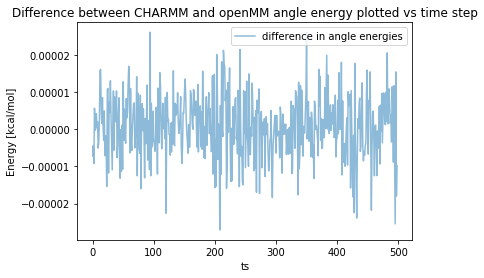

In [30]:
plt.plot(np.asarray(charmm_angle[3:]) - np.asarray(openMM_angle[:-1]), label='difference in angle energies', alpha=0.5)
plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')
plt.title('Difference between CHARMM and openMM angle energy plotted vs time step')

plt.legend()
plt.show()


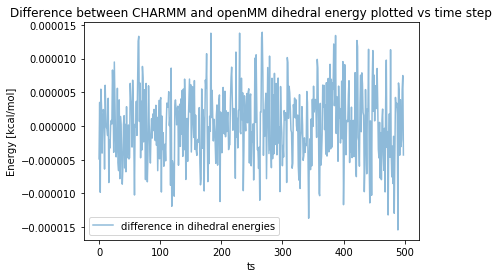

In [31]:
plt.plot(np.asarray(charmm_dihedral[3:]) - np.asarray(openMM_dihedral[:-1]), label='difference in dihedral energies', alpha=0.5)
plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')
plt.title('Difference between CHARMM and openMM dihedral energy plotted vs time step')

plt.legend()
plt.show()


In [ ]:
print(openMM_total[0] + pV* (unit.mole / unit.kilocalorie))
print(openMM_energy[0])
print(charmm_energy[3])

In [ ]:
import logging
def _generate_atom_tables_from_psf(psf, tlc):

    atom_idx_to_atom_name = dict()
    atom_name_to_atom_idx = dict()
    atom_name_to_atom_type = dict()
    atom_idx_to_atom_partial_charge = dict()

    list_idx = []
    for atom in psf.view[':' + str(tlc)].atoms:
        atom_name = atom.name
        list_idx.append(atom.idx)
        atom_index = atom.idx# - min(list_idx)
        atom_type = atom.type
        atom_charge = atom.charge

        atom_idx_to_atom_name[atom_index] = atom_name
        atom_name_to_atom_idx[atom_name] = atom_index
        atom_name_to_atom_type[atom_name] = atom_type
        atom_idx_to_atom_partial_charge[atom_index] = atom_charge

    return atom_idx_to_atom_name, atom_name_to_atom_idx, atom_name_to_atom_type, atom_idx_to_atom_partial_charge



def report_details_on_topology(psf, system, tlc):

    logging.info('########################################')
    logging.info('Reporting on modified system object ...')
    logging.info('########################################')


    atom_idx_to_atom_name, atom_name_to_atom_idx, atom_name_to_atom_type, atom_idx_to_atom_partial_charge = _generate_atom_tables_from_psf(psf, tlc)

    bond_string_from_openmm = 'Bond-ID: {:>3d} Atom-ID1: {:>3d} Atom-ID2: {:>3d} length: {: 02.4f} k: {: 02.4f}'
    atom_string = 'Atom-ID: {:>3d} Atom-Name: {:>4} Atom-Type: {:>3} Charge: {: 02.4f} Sigma: {: 02.4f} Epsilon: {: 02.4f}'
    angle_string_from_openmm = 'Angle-ID: {:>3d} Atom-ID1: {:>3d} Atom-ID2: {:>3d} Atom-ID3: {:>3d} angle: {: 02.4f} k: {: 02.4f}'
    proper_string_from_openmm = 'Proper-ID: {:>3d} Atom-ID1: {:>2d} Atom-ID2: {:>2d} Atom-ID3: {:>2d} Atom-ID4: {:>2d} periodicity: {: 02.4f} phase: {: 02.4f} k: {: 02.4f}'
    improper_string_from_openmm = 'ImProper-ID: {:>3d} Atom-ID1: {:>2d} Atom-ID2: {:>2d} Atom-ID3: {:>2d} Atom-ID4: {:>2d} phase: {: 02.4f} k: {: 02.4f}'
    exception_string = 'Atom-ID1: {:>3d} Atom-Name1: {:>4} Atom-Type1: {:>3} Charge: {: 02.4f} Sigma: {: 02.4f} Epsilon: {: 02.4f}'


    num_of_forces = system.getNumForces()
    
    for i in range(num_of_forces):
        force = system.getForce(i)
        
        if force.__class__.__name__ == 'HarmonicBondForce':
            print('########################################')
            print(force.__class__.__name__)
            print('Number of bonds: {}'.format(force.getNumBonds()))
            continue

            for j in range(force.getNumBonds()):
                a1, a2, bond_value, k = force.getBondParameters(j)
                print(bond_string_from_openmm.format(j, a1, a2, bond_value._value, k._value))

        elif force.__class__.__name__ == 'NonbondedForce':
            print('########################################')
            print(force.__class__.__name__)
            print('Number of atoms: {}'.format(force.getNumParticles()))

            for j in range(force.getNumParticles()):
                charge, sigma, epsilon = force.getParticleParameters(j)
                if j not in atom_idx_to_atom_name:
                    continue
                atom_type = atom_name_to_atom_type[atom_idx_to_atom_name[j]]
                print(atom_string.format(j, atom_idx_to_atom_name[j], atom_type, charge._value, sigma._value, epsilon._value))

            print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
            print(force.__class__.__name__)
            print('Number of exceptions: ' + str(force.getNumExceptions()))
            for j in range(force.getNumExceptions()):

                particle1, particle2, chargeProd, sigma, epsilon = force.getExceptionParameters(j)
                if particle1 not in atom_idx_to_atom_name:
                    continue

                [charge1, sigma1, epsilon1] = force.getParticleParameters(particle1)
                [charge2, sigma2, epsilon2] = force.getParticleParameters(particle2)
                print('$$$$$$$$$$$$$$$$$$$$$$$')
                print('Exception for : ' + str(atom_idx_to_atom_name[particle1]) + ' - ' + str(str(atom_idx_to_atom_name[particle2])))
                print('Parameters for {}: charge: {} sigma: {} epsilon: {}'.format(atom_idx_to_atom_name[particle1], charge1, sigma1, epsilon1))
                print('Parameters for {}: charge: {} sigma: {} epsilon: {}'.format(atom_idx_to_atom_name[particle2], charge2, sigma2, epsilon2))
                print('Parameters for 14Scaling: chargeProduct: {} sigma: {} epsilon: {}'.format(chargeProd, sigma, epsilon))


        elif force.__class__.__name__ == 'HarmonicAngleForce':
            print('########################################')
            print(force.__class__.__name__)
            print('Number of angles: {}'.format(force.getNumAngles()))
            continue
            for j in range(force.getNumAngles()):
                a1, a2, a3, angle_value, k = force.getAngleParameters(j)
                print(angle_string_from_openmm.format(j, a1, a2, a3, angle_value._value, k._value))

        elif force.__class__.__name__ == 'PeriodicTorsionForce':
            print('########################################')
            print(force.__class__.__name__)
            print('Number of torsions: {}'.format(force.getNumTorsions()))
            continue

            for j in range(force.getNumTorsions()):
                a1, a2, a3, a4, periodicity, phase, k = force.getTorsionParameters(j)
                print(proper_string_from_openmm.format(j, a1, a2, a3, a4, periodicity, phase._value, k._value))

        elif force.__class__.__name__ == 'CustomTorsionForce':
            print('########################################')
            print(force.__class__.__name__)
            print('Number of improper - torsions: {}'.format(force.getNumTorsions()))
            for j in range(force.getNumTorsions()):
                a1, a2, a3, a4, par = force.getTorsionParameters(j)
                print(improper_string_from_openmm.format(j, a1, a2, a3, a4, float(par[1]), float(par[0])))

        else:
            print('########################################')
            print(force.__class__.__name__)
            print('########################################')



In [ ]:
report_details_on_topology(psf, system, 'LIG')

In [ ]:
print(np.asarray(charmm_nonbonded[1]) - np.asarray(openMM_nonbonded[0]))
print(np.asarray(charmm_energy[1]) - np.asarray(openMM_energy[0]))



In [ ]:
plt.plot(charmm_energy[3:43], label='charmm total energy', alpha=0.5)
   
plt.plot(openMM_energy[0:40], label='openMM total energy', alpha=0.5)
plt.title('CHARMM and openMM total energy plotted vs time step')

plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')
plt.legend()
plt.show()


In [ ]:
plt.plot(np.asarray(charmm_energy[3:]) - np.asarray(openMM_energy[:-1]), label='charmm energy - openMM energy', alpha=0.5)
   
plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')
plt.title('Difference between CHARMM and openMM total energy plotted vs time step')

plt.legend()
plt.show()


In [ ]:
plt.plot(charmm_energy[3:], label='charmm total energy', alpha=0.5)
plt.plot(openMM_energy[0:-1], label='openMM total energy', alpha=0.5)

plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')

plt.legend()
plt.show()


In [ ]:
plt.plot(charmm_nonbonded, label='charmm - nonbonded', alpha=0.5)
plt.plot(openMM_nonbonded, label='openMM - nonbonded', alpha=0.5)
   
plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')

plt.legend()
plt.show()


In [ ]:
plt.plot(np.asarray(charmm_nonbonded[3:]) - np.asarray(openMM_nonbonded[:-1]), label='charmm nonbonded energy - openMM nonbonded energy', alpha=0.5)
   

plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')

plt.legend()
plt.show()


In [ ]:
plt.plot(np.asarray(charmm_nonbonded[1:]) - np.asarray(openMM_nonbonded[:-1]), label='charmm nonbonded energy - openMM nonbonded energy', alpha=0.5)
plt.plot(np.asarray(charmm_energy[1:]) - np.asarray(openMM_energy[:-1]), label='charmm total energy - openMM total energy', alpha=0.5)
   

plt.ylabel('Energy [kcal/mol]')
plt.xlabel('ts')

plt.legend()
plt.show()
